In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TV', ylabel='Count'>

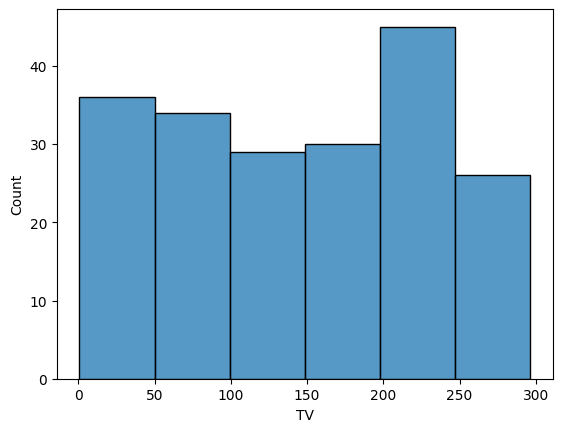

In [12]:
# Univariate and Bivariate analysis on Tv
sns.histplot(data = df, x = 'TV',bins =6)

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TV', ylabel='Density'>

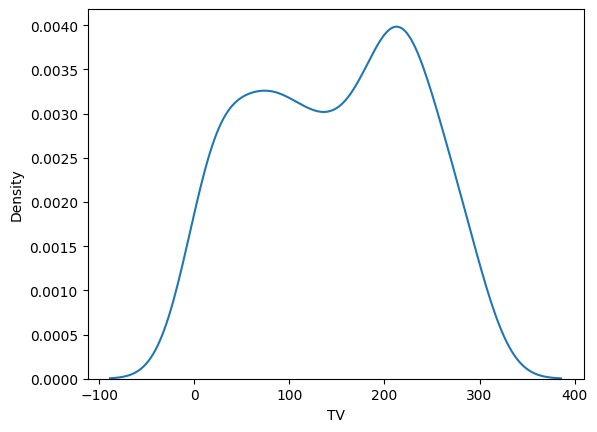

In [28]:
sns.kdeplot(data = df, x = 'TV')

<Axes: xlabel='TV', ylabel='Sales'>

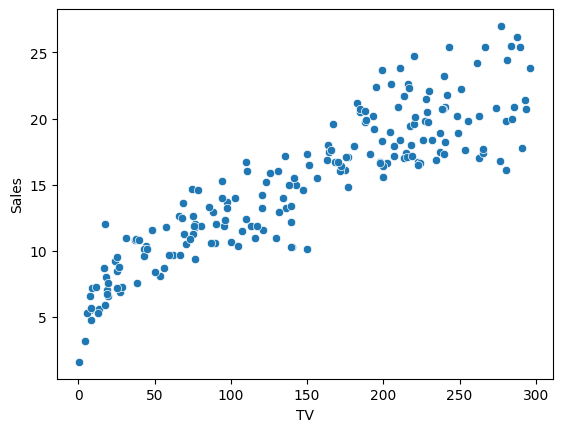

In [9]:
sns.scatterplot(data = df, x='TV', y = 'Sales')

<Axes: xlabel='TV', ylabel='Sales'>

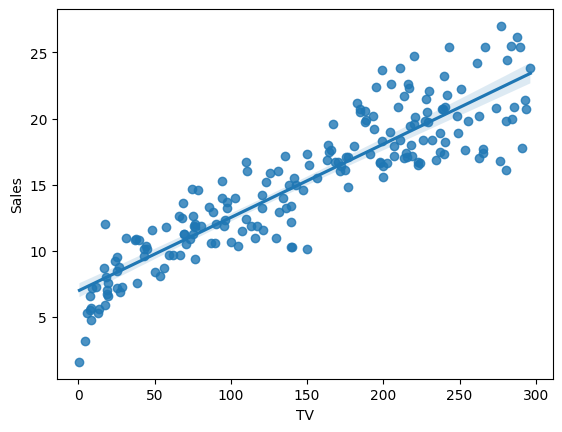

In [16]:
sns.regplot(data = df, x='TV', y = 'Sales')

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Radio', ylabel='Count'>

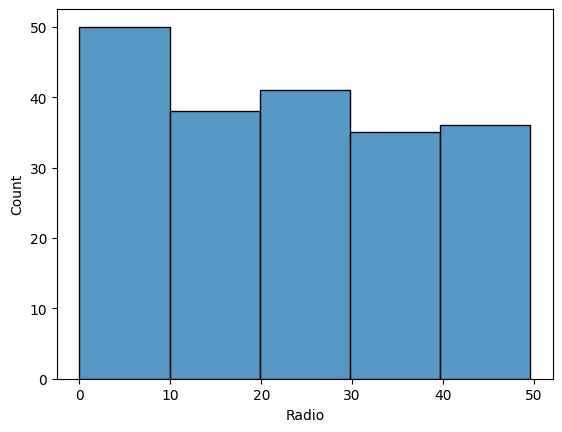

In [18]:
sns.histplot(data = df, x = 'Radio',bins = 5)

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Radio', ylabel='Density'>

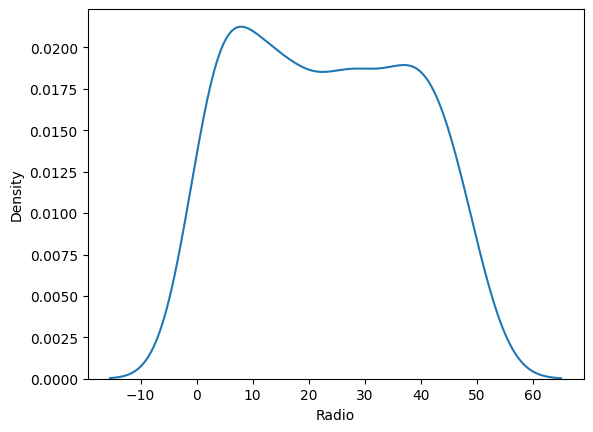

In [29]:
sns.kdeplot(data = df, x = 'Radio')

<Axes: xlabel='Radio', ylabel='Sales'>

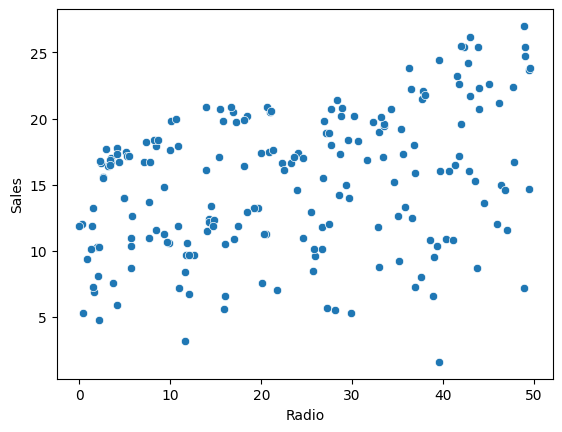

In [20]:
sns.scatterplot(data = df, x='Radio', y = 'Sales')

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Newspaper', ylabel='Count'>

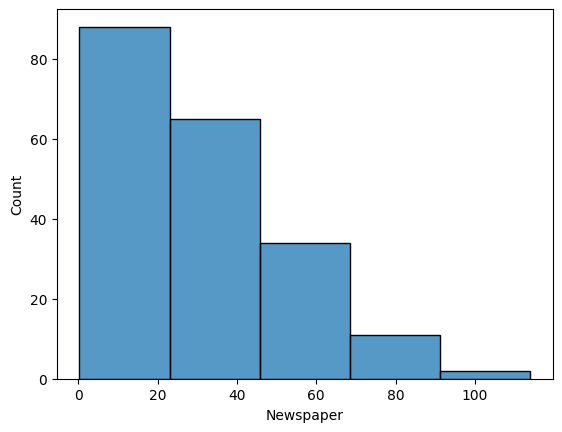

In [21]:
sns.histplot(data = df, x = 'Newspaper',bins = 5)

C:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Newspaper', ylabel='Density'>

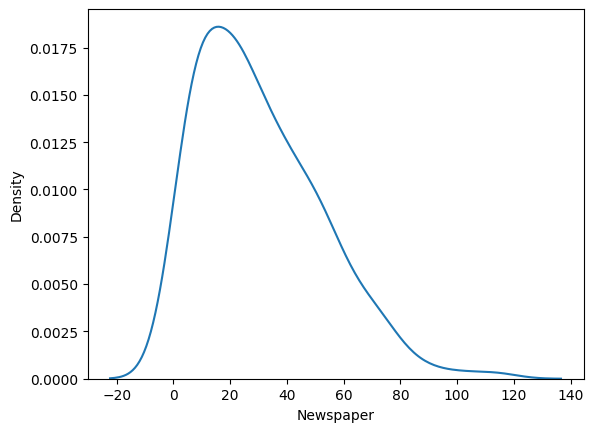

In [30]:
sns.kdeplot(data = df, x = 'Newspaper')

<Axes: xlabel='Newspaper', ylabel='Sales'>

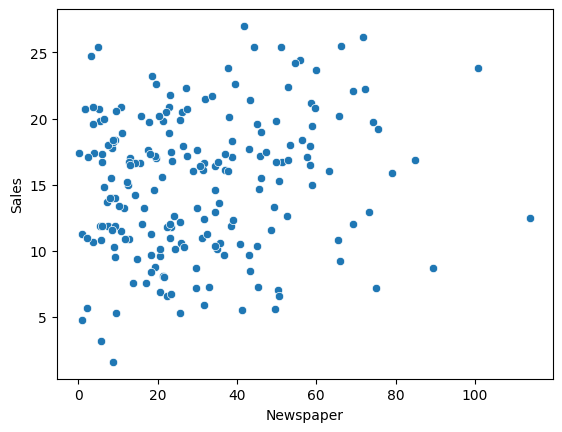

In [24]:
sns.scatterplot(data = df, x = 'Newspaper', y = 'Sales')

<Axes: >

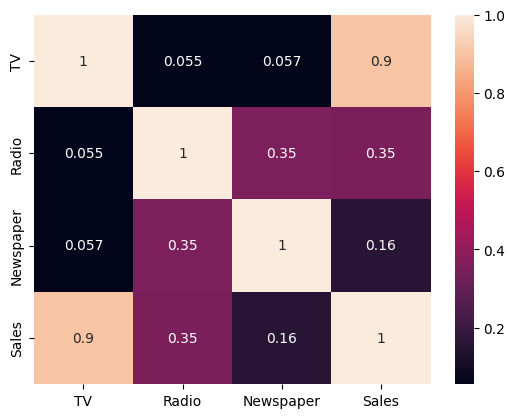

In [26]:
sns.heatmap(df.corr(),annot = True)

In [31]:
X = df.drop(columns='Sales')
y = df['Sales']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

In [38]:
pipeline1 = pipeline = Pipeline(steps=[
    ('regressor', XGBRegressor())
])

In [46]:
pipeline2 = pipeline = Pipeline(steps=[
    ('regressor', LinearRegression())
])

In [47]:
pipeline1.fit(X_train,y_train)
pipeline2.fit(X_train,y_train)

Pipeline(steps=[('regressor', LinearRegression())])

In [48]:
y_pred1 = pipeline1.predict(X_test)
y_pred2 = pipeline2.predict(X_test)

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1)

0.953029858014247

In [50]:
r2_score(y_test,y_pred2)

0.9059011844150826